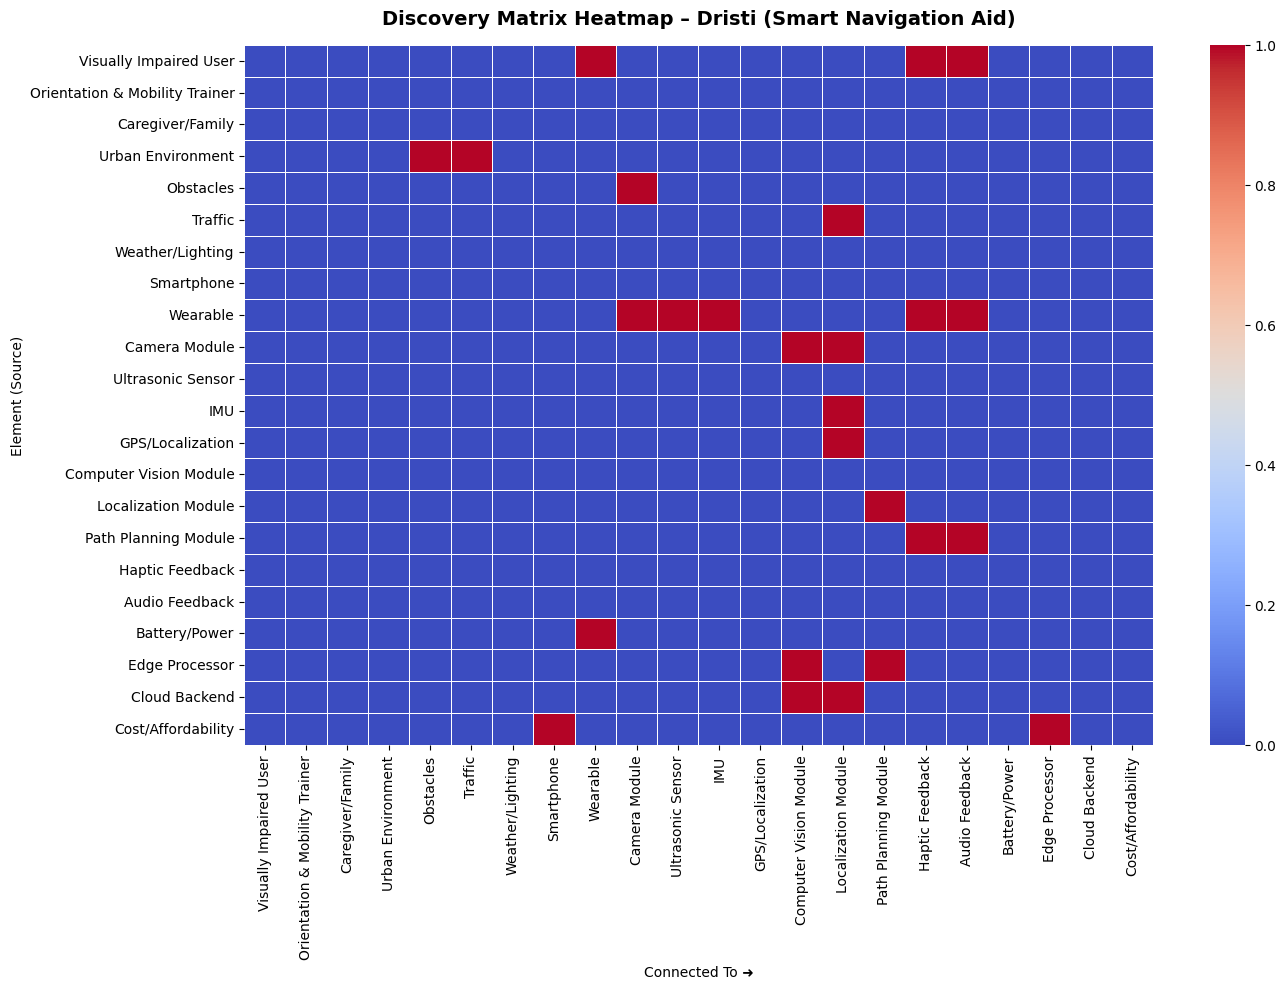

Number of Connections per Element:

Wearable                          5
Visually Impaired User            3
Path Planning Module              2
Cost/Affordability                2
Camera Module                     2
Urban Environment                 2
Edge Processor                    2
Cloud Backend                     2
Obstacles                         1
Traffic                           1
Localization Module               1
Battery/Power                     1
GPS/Localization                  1
IMU                               1
Caregiver/Family                  0
Orientation & Mobility Trainer    0
Smartphone                        0
Weather/Lighting                  0
Computer Vision Module            0
Ultrasonic Sensor                 0
Audio Feedback                    0
Haptic Feedback                   0
dtype: int64


In [1]:
# ==========================================
# DISCOVERY MATRIX - Dristi (दृष्टि) Project
# ==========================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 25 system elements ---
elements = [
    "Visually Impaired User", "Orientation & Mobility Trainer", "Caregiver/Family",
    "Urban Environment", "Obstacles", "Traffic", "Weather/Lighting",
    "Smartphone", "Wearable", "Camera Module", "Ultrasonic Sensor", "IMU",
    "GPS/Localization", "Computer Vision Module", "Localization Module",
    "Path Planning Module", "Haptic Feedback", "Audio Feedback",
    "Battery/Power", "Edge Processor", "Cloud Backend", "Cost/Affordability"
]

# --- Define relations (A -> B means connected) ---
relations = [
    ("Wearable", "Camera Module"),
    ("Wearable", "Ultrasonic Sensor"),
    ("Wearable", "IMU"),
    ("Wearable", "Haptic Feedback"),
    ("Wearable", "Audio Feedback"),
    ("Camera Module", "Computer Vision Module"),
    ("Edge Processor", "Computer Vision Module"),
    ("Edge Processor", "Path Planning Module"),
    ("GPS/Localization", "Localization Module"),
    ("IMU", "Localization Module"),
    ("Camera Module", "Localization Module"),
    ("Localization Module", "Path Planning Module"),
    ("Path Planning Module", "Haptic Feedback"),
    ("Path Planning Module", "Audio Feedback"),
    ("Cloud Backend", "Computer Vision Module"),
    ("Cloud Backend", "Localization Module"),
    ("Urban Environment", "Obstacles"),
    ("Urban Environment", "Traffic"),
    ("Obstacles", "Camera Module"),
    ("Traffic", "Localization Module"),
    ("Battery/Power", "Wearable"),
    ("Visually Impaired User", "Wearable"),
    ("Visually Impaired User", "Audio Feedback"),
    ("Visually Impaired User", "Haptic Feedback"),
    ("Cost/Affordability", "Smartphone"),
    ("Cost/Affordability", "Edge Processor"),
]

# --- Create adjacency matrix ---
matrix = pd.DataFrame(0, index=elements, columns=elements)

for a, b in relations:
    if a in elements and b in elements:
        matrix.loc[a, b] = 1

# --- Visualize as heatmap ---
plt.figure(figsize=(14, 10))
sns.heatmap(matrix, cmap="coolwarm", cbar=True, linewidths=0.5)
plt.title("Discovery Matrix Heatmap – Dristi (Smart Navigation Aid)", fontsize=14, fontweight="bold", pad=15)
plt.xlabel("Connected To ➜")
plt.ylabel("Element (Source)")
plt.tight_layout()
plt.show()

# --- Count number of connections per element ---
connections = matrix.sum(axis=1)
print("Number of Connections per Element:\n")
print(connections.sort_values(ascending=False))


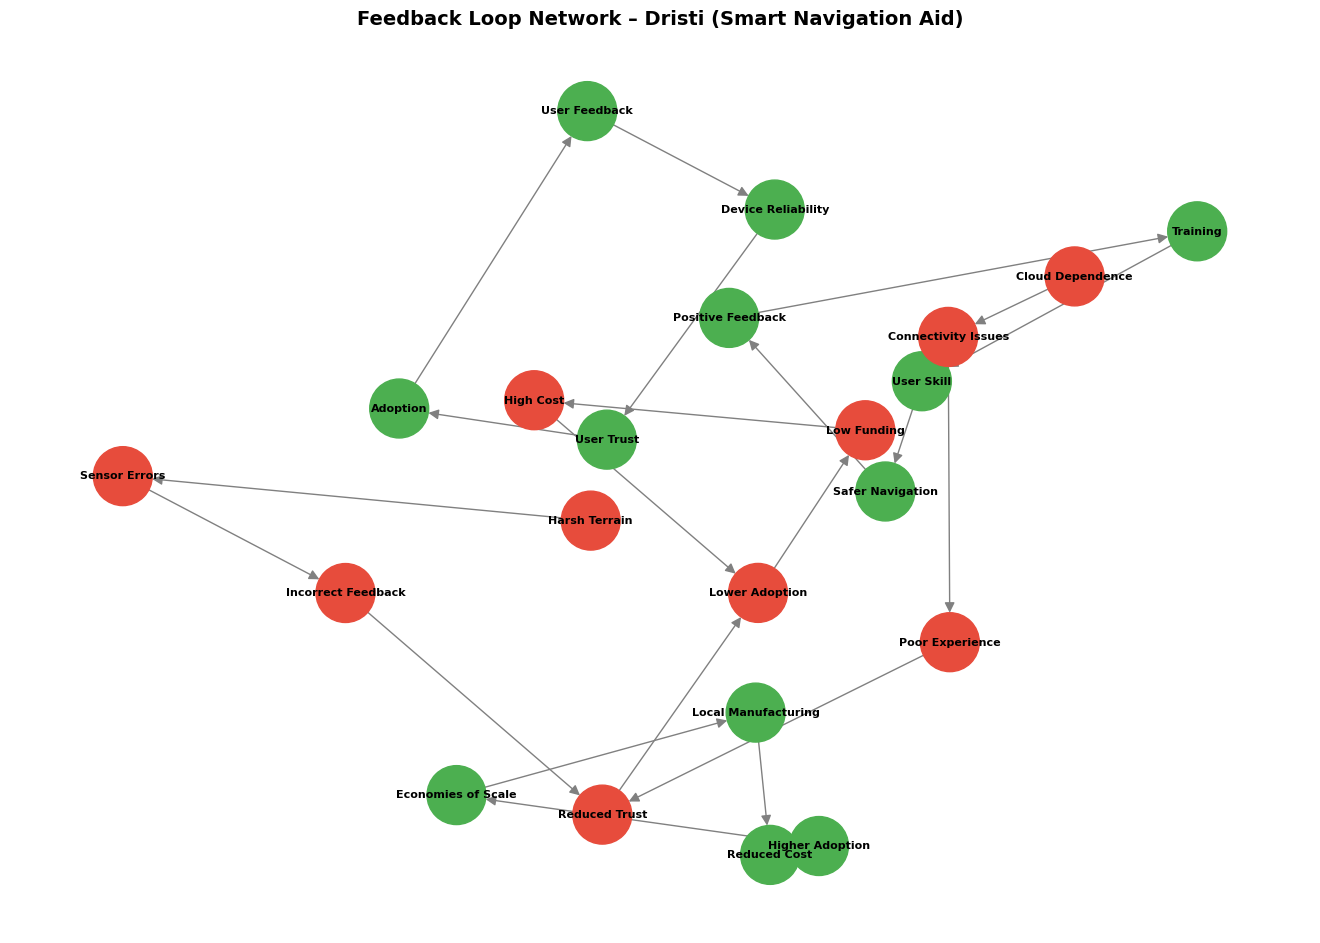

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# Define feedback loop edges
edges = [
    # Stable loops
    ("Device Reliability", "User Trust"),
    ("User Trust", "Adoption"),
    ("Adoption", "User Feedback"),
    ("User Feedback", "Device Reliability"),
    ("Training", "User Skill"),
    ("User Skill", "Safer Navigation"),
    ("Safer Navigation", "Positive Feedback"),
    ("Positive Feedback", "Training"),
    ("Local Manufacturing", "Reduced Cost"),
    ("Reduced Cost", "Higher Adoption"),
    ("Higher Adoption", "Economies of Scale"),
    ("Economies of Scale", "Local Manufacturing"),

    # Destabilizing loops
    ("High Cost", "Lower Adoption"),
    ("Lower Adoption", "Low Funding"),
    ("Low Funding", "High Cost"),
    ("Cloud Dependence", "Connectivity Issues"),
    ("Connectivity Issues", "Poor Experience"),
    ("Poor Experience", "Reduced Trust"),
    ("Reduced Trust", "Lower Adoption"),
    ("Harsh Terrain", "Sensor Errors"),
    ("Sensor Errors", "Incorrect Feedback"),
    ("Incorrect Feedback", "Reduced Trust"),
]

# Build the graph
G = nx.DiGraph()
G.add_edges_from(edges)

# Node colors for loop types
node_colors = []
for n in G.nodes():
    if n in ["Device Reliability", "User Trust", "Adoption", "User Feedback", 
             "Training", "User Skill", "Safer Navigation", "Positive Feedback", 
             "Local Manufacturing", "Reduced Cost", "Higher Adoption", "Economies of Scale"]:
        node_colors.append("#4CAF50")  # Green for stable
    else:
        node_colors.append("#E74C3C")  # Red for destabilizing

plt.figure(figsize=(13, 9))
pos = nx.spring_layout(G, seed=42, k=0.7)

nx.draw(G, pos, with_labels=True, node_color=node_colors,
        node_size=1800, arrows=True, arrowsize=15,
        font_size=8, font_weight="bold", edge_color="gray")

plt.title("Feedback Loop Network – Dristi (Smart Navigation Aid)", fontsize=14, fontweight="bold")
plt.show()
